In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

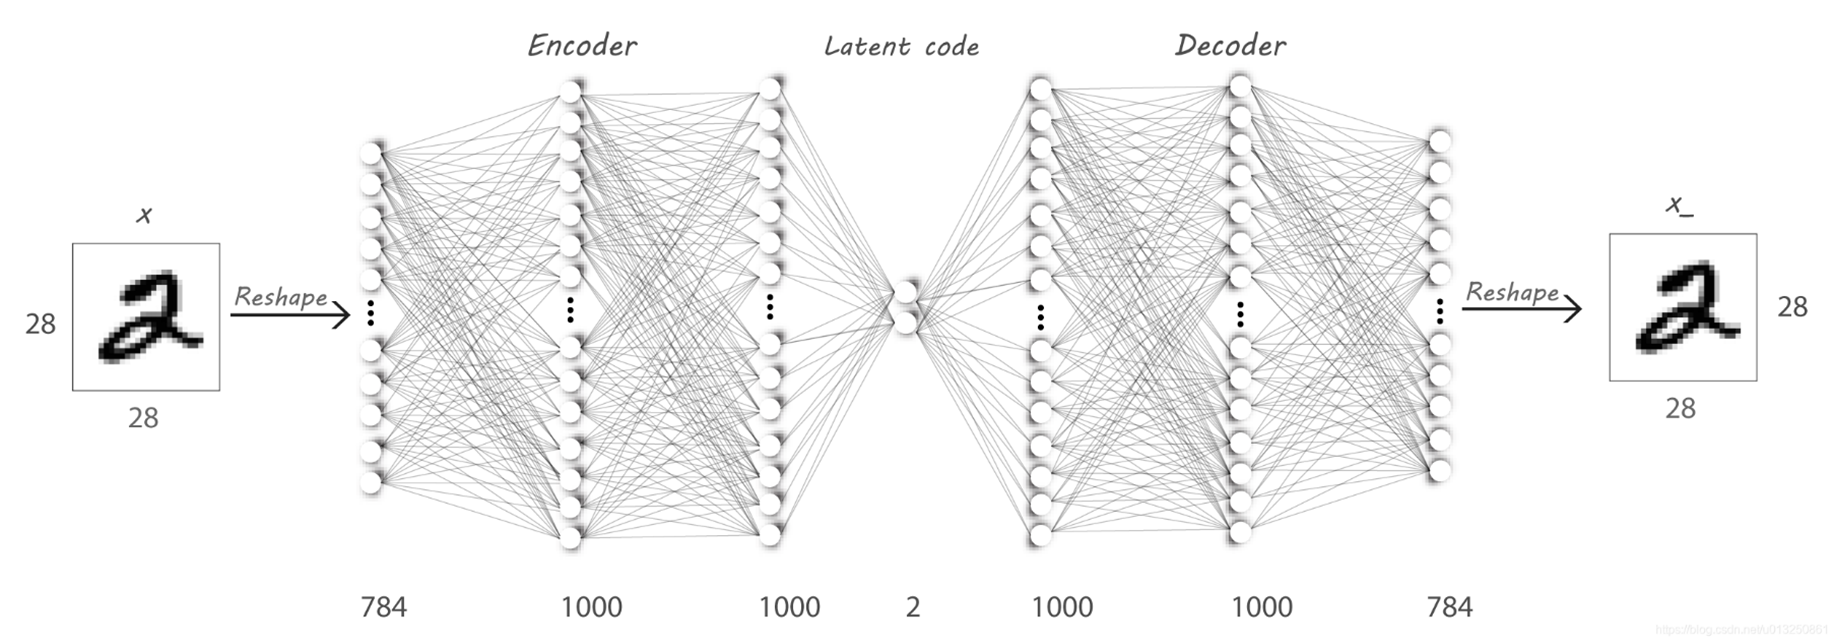

In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()

    # Encoder
    self.encoder = nn.Sequential(
        nn.Linear(784, 1000),
        nn.ReLU(True),
        nn.Linear(1000, 1000),
        nn.ReLU(True),
        nn.Linear(1000, 2)
    )

    # Decoder
    self.decoder = nn.Sequential(
        nn.Linear(2, 1000),
        nn.ReLU(True),
        nn.Linear(1000, 1000),
        nn.ReLU(True),
        nn.Linear(1000, 784)
    )

  def forward(self, x):
    x = x.view(-1, 784) # 28X28X1 => -1, 784
    latent_code = self.encoder(x)
    x_reconstruted = self.decoder(latent_code)
    x_reconstruted = x_reconstruted.view(-1, 1, 28, 28)
    return x_reconstruted

In [ ]:
batch_size = 64
learning_rate = 1e-3
num_epochs = 30

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.), (0.5,))
])

In [ ]:
# Loading MNIST
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 488kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.42MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 13.4MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
  for data in train_loader:
    img, _ = data
    output = model(img)
    loss = criterion(output, img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch [{epoch+1}/{num_eopchs}], Loss: {loss.item():.4f}")

# save the model
torch.save(model.state_dict(), "autoencoder.pth")
print("Model has been trained and saved!")

In [ ]:
model = Autoencoder()
model.load_state_dict(torch.load("autoencoder.pth"))
model.eval()

<ipython-input-15-12921b5f9f99>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("autoencoder.pth"))


Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1000, out_features=1000, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=1000, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1000, out_features=1000, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=1000, out_features=784, bias=True)
  )
)

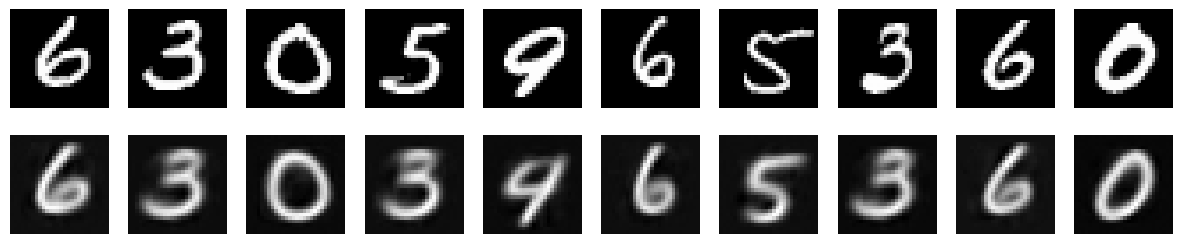

In [ ]:
import matplotlib.pyplot as plt

test_dataset = datasets.MNIST(
    root="./data", train=False, transform=transform
)
test_loader = DataLoader(
    dataset=test_dataset, batch_size=10, shuffle=True
)

dataiter = iter(test_loader)
images, _ = next(dataiter)

reconstructed_images = model(images)

fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
  # Original Images
  axes[0, i].imshow(
      images[i].view(28, 28).detach().numpy(),
      cmap="gray"
  )
  axes[0, i].axis("off")
  # Reconstructed Images
  axes[1, i].imshow(
      reconstructed_images[i].view(28, 28).detach().numpy(),
      cmap="gray"
  )
  axes[1, i].axis("off")
plt.show()